In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
def rhs2(t, y, k, m, g, N):
    x, v = np.split(y, 2)
    xdot = v
    vdot = np.zeros_like(v)
    vdot[0] = -N*g + k/m * (x[1] - x[0])
    vdot[1:-1] = k/m * (x[2:] - 2*x[1:-1] + x[:-2])
    vdot[-1] = k/m * (x[-2] - x[-1])
    return np.hstack((xdot, vdot))

In [3]:
#Data from our springs and masses
#L0 = 0.4639
#l0 = L0 / (N - 1)
KK = 0.4399
MM = 56.6E-3
g = 9.81

In [4]:
# Simple run
N = 3
k = KK * (N - 1)
m = MM
x0 = np.zeros(N)
v0 = np.zeros(N)
y0 = np.hstack((x0, v0))
soluc = solve_ivp(rhs2, [0, 0.4], y0, args=[k, m, g, N], max_step=0.01)
tn = soluc.t
xn, vn = (np.vsplit(soluc.y, 2))

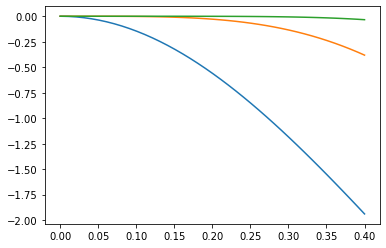

In [5]:
plt.plot(tn, xn[0], tn, xn[1], tn, xn[2]);

In [6]:
# Generate data for plots of last mass for different N's
tx_data = []
for N in (2, 3, 4, 5):
    k = KK * (N - 1)
    m = MM
    x0 = np.zeros(N)
    v0 = np.zeros(N)
    y0 = np.hstack((x0, v0))
    soluc = solve_ivp(rhs2, [0, 0.4], y0, args=[k, m, g, N], max_step=0.005)
    tn = soluc.t
    xn, vn = (np.vsplit(soluc.y, 2))
    tx_data.append((N,tn,xn[-1]))


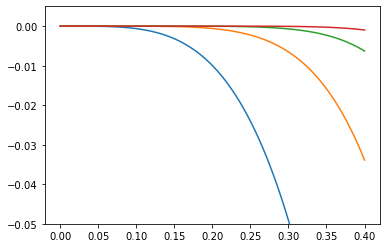

In [7]:
for case in tx_data:
    t = case[1]
    x = case[2]
    plt.ylim([-0.05,0.005])
    plt.plot(t, x);

In [22]:
tx_data[0]

(2,
 array([0.000e+00, 1.000e-04, 1.100e-03, 6.100e-03, 1.110e-02, 1.610e-02,
        2.110e-02, 2.610e-02, 3.110e-02, 3.610e-02, 4.110e-02, 4.610e-02,
        5.110e-02, 5.610e-02, 6.110e-02, 6.610e-02, 7.110e-02, 7.610e-02,
        8.110e-02, 8.610e-02, 9.110e-02, 9.610e-02, 1.011e-01, 1.061e-01,
        1.111e-01, 1.161e-01, 1.211e-01, 1.261e-01, 1.311e-01, 1.361e-01,
        1.411e-01, 1.461e-01, 1.511e-01, 1.561e-01, 1.611e-01, 1.661e-01,
        1.711e-01, 1.761e-01, 1.811e-01, 1.861e-01, 1.911e-01, 1.961e-01,
        2.011e-01, 2.061e-01, 2.111e-01, 2.161e-01, 2.211e-01, 2.261e-01,
        2.311e-01, 2.361e-01, 2.411e-01, 2.461e-01, 2.511e-01, 2.561e-01,
        2.611e-01, 2.661e-01, 2.711e-01, 2.761e-01, 2.811e-01, 2.861e-01,
        2.911e-01, 2.961e-01, 3.011e-01, 3.061e-01, 3.111e-01, 3.161e-01,
        3.211e-01, 3.261e-01, 3.311e-01, 3.361e-01, 3.411e-01, 3.461e-01,
        3.511e-01, 3.561e-01, 3.611e-01, 3.661e-01, 3.711e-01, 3.761e-01,
        3.811e-01, 3.861e-01, 3.91

In [25]:
len(tx_data[0][2])

83